<a href="https://colab.research.google.com/github/matheusbuniotto/portfolio/blob/main/Projeto_Detec%C3%A7%C3%A3o_de_Fraudes_em_cart%C3%B5es_de_cr%C3%A9dito_%5BMachine_Learning%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="#"><img src="https://github.com/matheusbuniotto/portifolio/blob/main/logo_vertical.png?raw=true" width='210px' alt="logo" border="0"></a>
#### **Projeto Machine Learning - Detecção de Fraude**
#### *Data Science na Prática**
*por Matheus Buniotto*

---



# Detecção de Fraudes em Cartões de Crédito

<a href="#"><img src="https://github.com/matheusbuniotto/presets/blob/main/projeto-matheus-cart%C3%A3o.png?raw=true" width='100%' alt="banner" border="0"></a>


No ano de 2020 foi um ano de repleto de transformações digitais. Devido à pandemia e o isolamento social, ocorreu uma explosão no consumo de serviços de streaming, delivery e também nas compras realizadas através da internet. 

Esse aumento repentino no nas compras e consumos de serviços online trouxeram algumas consequências indesejadas, uma delas foi o **grande aumento no número de fraudes e golpes no ambiente digital.**

Uma pesquisa realizada pela multinacional Visa aponta que o **Brasil é o segundo pais da América Latina no ranking de fraudes no comércio virtual**, perdendo apenas para o México.

Com o aumento do consumo em ambiente digital os criminosos também aumentaram os ataques na modalidade phishing, que cresceu cerca de 80% durante a pandemia. O Phishing é usado para roubar informações pessoais de usuários através de e-mails ou redes sociais fingindo ser uma empresa ou serviço conhecido.

Uma das formas implementadas pelos Bancos e fintech's para evitar que os clientes sejam vítimas de fraudes é a utilização de a**lgoritmos que detectam comportamentos estranhos ou tentativa de fraude.**

Nesse projeto, vamos utilizar algumas técnicas de **classificação para detectar possíveis fraudes** nos dados de cartão de crédito.






## Obtenção dos dados
Os dados utilizados para esse projeto são de algumas empresas européias de cartão de crédito. Apesar do grande volume de dados, representando um total de 284807 transações, as operações financeiras represetam apenas um período de dois dias, no mês de setembro de 2013. 

Dentre esse total de mais de 284 mil transações, apenas 492 foram transações fraudulentas. Nosso trabalho aqui, será utilizar as informações provenientes dessas 492 transações para que possamos criar um modelo de detecção de fraudes. Para isso, utilizaremos a variável Class, que representa se a transação foi fraudulenta ou não (1 para fraude e 0 caso não for).

Devido à questões de confidencialidade, todas as *variáveis* passaram por um processo de descaracterização, tendo seus nomes subistituidos por: V1,V2,V3...
Outro detalhe importante é que os dados passaram por um processo de PCA (Análise de Componentes Principais), exceto as variáveis 'Time' e 'Amount', que representando sucessivamente o tempo decorrido entre cada transação e o valor da transação. 

A análise de componentes principais é uma técnica da estatística multivariada que consiste em transformar um conjunto de variáveis originais em outro conjunto de variáveis de mesma dimensão denominadas de componentes principais. (VARELLA, Carlos Alberto Alves. Disponível em: [Análise de Componentes
Principais](http://www.ufrrj.br/institutos/it/deng/varella/Downloads/multivariada%20aplicada%20as%20ciencias%20agrarias/Aulas/analise%20de%20componentes%20principais.pdf))

Os dados podem ser obtidos através do link: [Dataset Credit Card](https://www.kaggle.com/mlg-ulb/creditcardfraud)




In [1]:
!pip install scikit-plot -q

In [2]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler #balancear dados
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
import scikitplot as skplt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, auc

%matplotlib inline

# configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# importar os dados para um dataframe
df = pd.read_csv("https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1")

## Etapas para resolução do problema 
Antes de mais nada, serão definidas as etapas que serão seguidas para solução do problema:

1.   **Definição do problema**
2.   **Análise exploratória**
3.   **Preparação dos dados**
4.   **Modelagem do algoritmo**
5.   **Avaliação**




## 1. Definição do problema
Como descrito acima, as fraudes em cartões de créditos estão aumentando vertiginosamente. Uma forma que as empresas de cartões de créditos encontram para combater esse tipo de crime, é a criação de algoritmos para detecção de fraudes e transações suspeitas.

## 2. Análise Exploratória
Nessa etapa iremos explorar a fundo o conjunto de dados, com o intuito de extrair informações e "insights" que possam guiar nossa análise e a construção do algoritmo para detectar as fraudes nas transações dos cartões. 

Primeiramente vamos enteder qual o tamanho do nosso conjunto de dados, quantas entradas e quantas colunas ele possui.

In [4]:
df.shape
print("\nO conjunto de dados possui {:} entradas.\n".format((df.shape[0])))
print("\nO conjunto de dados possui {:} variáveis.\n".format((df.shape[1])))


O conjunto de dados possui 284807 entradas.


O conjunto de dados possui 31 variáveis.



Usando a função .head conseguimos avaliar as 5 primeiras entradas dos conjunto de dados. Aqui já conseguimos ver que os dados passaram pelo processo de PCA e somente as variáveis Time e Amount não foram pré-processadas. Além disso, também vamos usar a função .tail que nos permite visualizar as últimas entradas.

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Sabemos que os maiores problemas presentes nos conjuntos de dados são em relação à qualidade dos dados. Nessa etapa vamos verificar a quantidade de valores ausentes e nulos em nosso dataset.



In [7]:
nulos = df.isnull().sum()
print(nulos[nulos > 0])

Series([], dtype: int64)


O conjunto de dados não possui nenhum valor ausente ou nulo, resultado de um possível tratamento realizado anteriormente.

In [8]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Utilizamos a função describe(), que nos traz um “resumo estatísticos” do conjunto de dados.

As informações estatísticas, como media, mediana, valores máximos, mínimos e quartis, que vão nos fornecer insighs importantes sobre o tema analisado.
Além disso, podemos ter uma primeira ideia se existem alguns dados discrepantes que necessitem um tratamento mais apurado para que não tornem nossos resultados enviesados.

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### 2.2 Visualização dos dados

Agora, vamos partir para a visualização dos dados do dataset. A visualização dos dados:



*   Ajuda identificar padrões
*   Facilita o tratamento da informação
*   Permite descobrir e visualizar as correlações
*   Nos permite interpretar e comunicar as informações de forma melhor

Como é a nossa distribuição de Classes? 

In [10]:
print(df.Class.value_counts())
print("\nFraudes representam {:.2f}% do dataset.\n".format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

0    284315
1       492
Name: Class, dtype: int64

Fraudes representam 0.17% do dataset.



O conjunto de dados possui 492 entradas classificadas como **Fraudes** (Classe = 1), esse número representa apenas 0,17% dos dados do conjunto, que possui um total de 284807 entradas. Vamos gerar um gráfico para vermos essa distrubição.

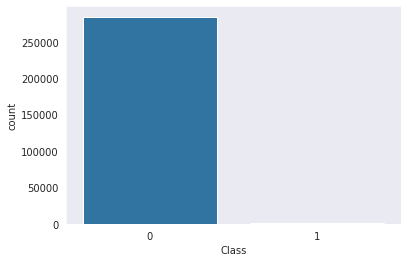

In [11]:
sns.countplot(data=df, x='Class')

Através desse gráfico e da análise preliminar vemos que o conjunto de dados é extremamente ***desbalanceado.***

Agora, vamos analisar a distribuição das fraudes em relação ao tempo decorrido e ao valor da transação.

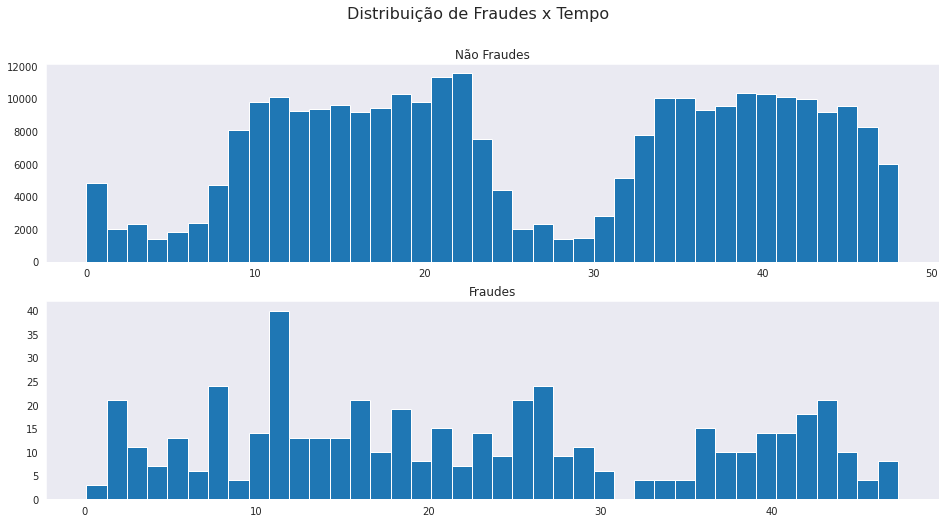

In [12]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,8))

df["Time_Hora"] = df["Time"]/3600
ax1.hist(df.Time_Hora[df['Class'] == 0], bins = 40);
ax2.hist(df.Time_Hora[df['Class'] == 1], bins = 40);
ax1.set_title('Não Fraudes')
ax2.set_title('Fraudes')
fig.suptitle('Distribuição de Fraudes x Tempo', fontsize=16)

plt.show()

Podemos ver que a distribuição das transações não fraudulentas seguem uma ordem, com picos e baixas, seguindo a distribuição de consumo diário das pessoas. Já as distribuições fraudulentas, são mais constantes, não sofrendo variações com o tempo.

In [13]:
df.drop(['Time_Hora'], axis=1, inplace=True)

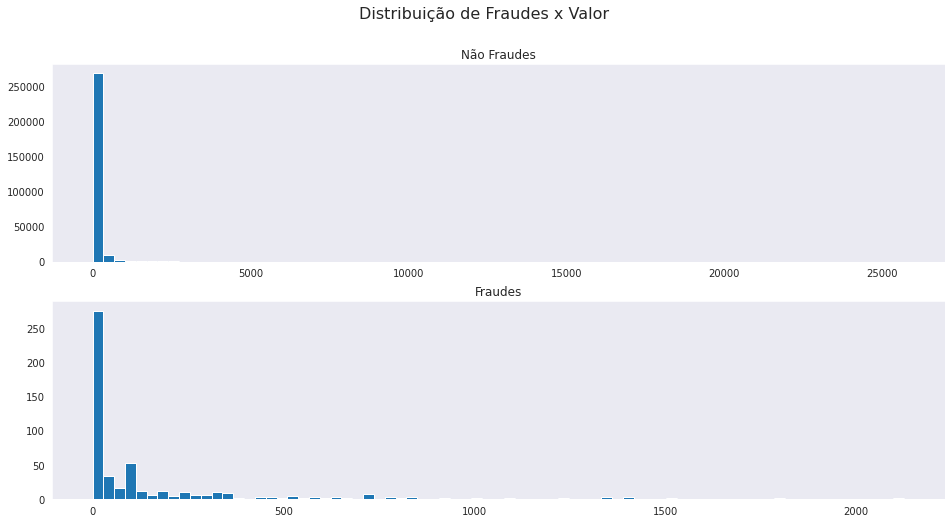

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,8))

#grafico
ax1.hist(df.Amount[df['Class'] == 0], bins = 75);
ax2.hist(df.Amount[df['Class'] == 1], bins = 75);
ax1.set_title('Não Fraudes')
ax2.set_title('Fraudes')
fig.suptitle('Distribuição de Fraudes x Valor', fontsize=16)

plt.show()

Analisando o gráfico vemos que a grande maioria das fraudes possui um valor menor que $500,00. Vamos analisar melhor a variável "Amount", que representa o valor da transação.

Estatística para as transações de todo o conjunto de dados.

In [15]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Estatística para as transações de todos as transações não fraudulentas.



In [16]:
df.Amount[df['Class'] == 0].describe()


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Estatística para as transações de todos as transações fraudulentas.


In [17]:
df.Amount[df['Class'] == 1].describe()


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

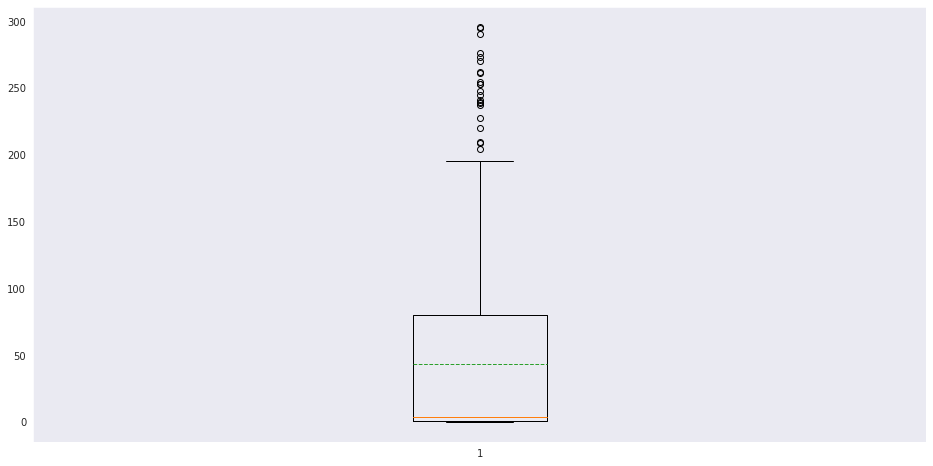

In [18]:
fig, ax = plt.subplots(figsize=(16,8))

bplot = df.loc[df['Amount'] <= 300];
ax.boxplot(bplot.Amount[bplot['Class'] == 1], showmeans=True, meanline=True);


Vemos que os valores da transações fraudulentas x não fraudulentas:
* As fraudes possuem um valor médio de 122,00 e as transações não fraudulentas possuem uma média de 250,00
* A mediana das fraudes é de 9,25 versus uma mediana de 22,00 das transações consideradas não fraudulentas
* Valor máximo de uma fraude foi de 2125,87 enquanto o valor máximo registrado para uma transação normal foi de 25691,16

Essas informações nos fornecem uma pista de sobre uma das caracteristicas das fraudes em comparação a transações regulares.

Vamos investigar se nosso conjunto de dados possui alguma correlação entre as variáveis e a classe "fraude".

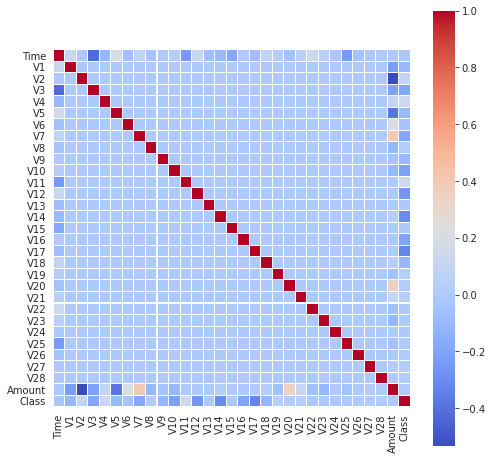

In [19]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, square=True, linewidths=0.05, cmap="coolwarm");

Até o momento, não é possível detectar nenhuma correlação aparente, após um processamento e tratamento dos dados, vamos retorna à esse gráfico de correlação para analisar se houve algum avanço nessa investigação de correlações.

## 3. Preparação dos Dados

Nessa etapa trataremos nossos dados para que possamos treinar nosso Algorítmo e obter os melhores resultados possíveis. Anteriormente descobrimos que o conjunto de dados é desbalanceado e passou por uma processo de pré-processamento e normalização. Vamos adequar os dados para nossa análise.

* Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
* Dividir o conjunto de dados entre treino e teste
* Balancear o conjunto de dados

Dividiremos nosso conjunto de dados para treinamento do modelo e para o teste futuro.

**Dados para Treino**

Dados de treino são os dados utilizados pelo algoritmo de machine learning para criação do modelo de previsão/classificação. 

**Dados para Teste** 

Serão informados ao modelo após seu treinamento, simulando previsões reais que o modelo realizará, permitindo assim que o desempenho mais real seja avaliado.

In [20]:
#dividir entre treinamento e teste
X = df.drop(['Class'], axis=1)
y = df.Class

In [21]:
print('Dataset completo:', df.shape)
print('Dataset de treinamento:', X.shape)
print('Dataset de alvo:', y.shape)

Dataset completo: (284807, 31)
Dataset de treinamento: (284807, 30)
Dataset de alvo: (284807,)


In [22]:
#dividir entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

Após realizar a divisão dos dados entre **teste e treino**, vamos normalizar os valores que não foram pré-processados anteriormente: Amount e Time.
Faremos isso separadamente nos modelos de teste e treino, para que não haja interferência no nosso modelo de teste.

In [23]:
# parametrizar scaler
scaler = StandardScaler()

#normalizar os dados treino
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Além disso, iremos balancear os dados, como vimos anteriormente, as fraudes representam apenas 0,17% das transações do conjunto de dados. Aqui, vamos balancear as fraudes e não fraudes em nosso conjunto de treino. Para isso usaremos ***under-sampling*** para igualar a quantidade de Fraudes e Não Fraudes.

In [24]:
#balancear os dados de treino
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


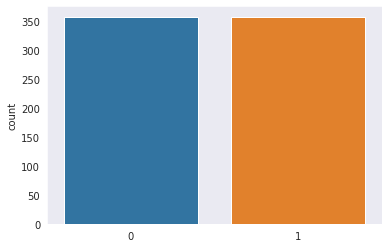

In [25]:
#verificar dataset balanceado
sns.countplot(y_rus);

Através do gráfico verificamos que os dados foram balanceados corretamente no nosos conjunto de treino. Agora, vamos verificar novamente a correlação entre as variáveis.

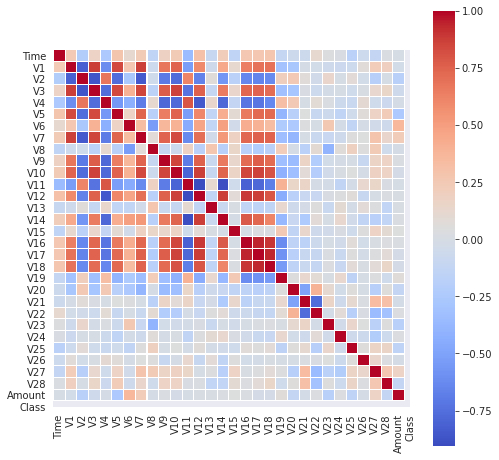

In [26]:
#correlação normalizada e balanceada
corr_rus = pd.DataFrame(X_rus).corr()


# gráfico heatmap
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr_rus, square=True, xticklabels=df.columns, yticklabels=df.columns, linewidths=0.05, cmap="coolwarm")



Após a normalização e balanceamento dos dados, finalmente conseguimos ver as correlações apresetadas no conjunto de dados.

### 4. Modelo Machine Learning

Aqui, escolheremos vamos escolher o modelo de classificação, treinar com nossos dados e verificar sua acertividade no conjunto de testes.

#### Modelo de Regressão Logistica

A regressão logística é um recurso que nos permite estimar
a probabilidade associada à ocorrência de determinado
evento em face de um conjunto de variáveis explanatórias. Vamos treinar nosso modelo e avaliar seu desempenho utilizando uma matriz de confusão. Além disso, vamos utilizar acurácia, recall e AUC, para avaliar o desempenho do nosso modelo.

In [27]:
#logistic regression

#1 escolher modelo
from sklearn.linear_model import LogisticRegression

#2 parametrizar modelo
LR = LogisticRegression(max_iter=125, multi_class='ovr', solver='liblinear')

#3 dividir modelo
#já realizado

#4 treinar modelo
LR.fit(X_rus, y_rus)

#5 fazer as previsões
y_pred = LR.predict(X_test)
y_pred_proba = LR.predict_proba(X_test)


Após o treinamento e a previsão do modelo, vamos analisar os dados de desempenho.

Relatório de Classificação:
               precision    recall  f1-score   support

           0      1.000     0.967     0.983     71067
           1      0.052     0.956     0.099       135

    accuracy                          0.967     71202
   macro avg      0.526     0.961     0.541     71202
weighted avg      0.998     0.967     0.982     71202

Acurácia de : 0.967

Recall de: 0.956

ROC AUC Score: 0.961



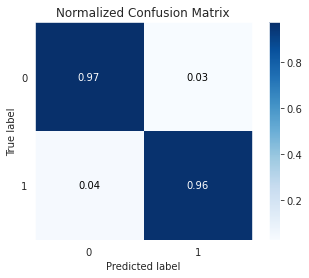

In [28]:
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=3))
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True);


# acurácia, recall e AUC do modelo
print("Acurácia de : {:.3f}\n".format(accuracy_score(y_test, y_pred)))
print("Recall de: {:.3f}\n".format(recall_score(y_test, y_pred)))
print("ROC AUC Score: {:.3f}\n".format(roc_auc_score(y_test, y_pred)))


### Modelo Árvore de Decisão


Nosso modelo poderia ser melhor? Agora, vamos criar um modelo baseado em Árvore de decisão e comparar com nosso modelo anterior.

Uma arvore de decisão divide os dados em varios pontos de decisão. Estes pontos são chamados de "nós" e a partir deles uma decisão será tomada, seguir para um outro "ramo", ou por outro. 

<a href="#"><img src="https://didatica.tech/wp-content/uploads/2020/07/image-5.png" width='100%' alt="banner" border="0"></a>
Figura: Árvore de Decisão,[fonte](https://didatica.tech/como-funciona-o-algoritmo-arvore-de-decisao/)

In [29]:
# tree-classifier

#1 escolher modelo
from sklearn.tree import DecisionTreeClassifier

#2 parametrizar modelo
DT = DecisionTreeClassifier(max_depth=9)

#3 dividir modelo
#já realizado

#4 treinar modelo
DT.fit(X_rus, y_rus)

#5 fazer as previsões
y_pred_dt = DT.predict(X_test)


Novamente, vamos verificar o relatório de desempenho do nosso modelo:

Relatório de Classificação:
               precision    recall  f1-score   support

           0      1.000     0.914     0.955     71067
           1      0.021     0.956     0.040       135

    accuracy                          0.914     71202
   macro avg      0.510     0.935     0.498     71202
weighted avg      0.998     0.914     0.953     71202

Acurácia de : 0.914

Recall de: 0.956

ROC AUC Score: 0.935



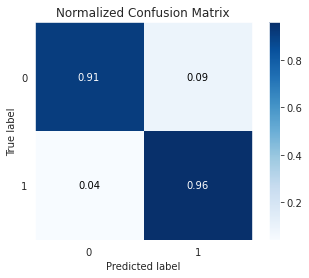

In [30]:
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_dt, digits=3))
skplt.metrics.plot_confusion_matrix(y_test, y_pred_dt, normalize=True);

# acuracia do modelo
print("Acurácia de : {:.3f}\n".format(accuracy_score(y_test, y_pred_dt)))
print("Recall de: {:.3f}\n".format(recall_score(y_test, y_pred_dt)))
print("ROC AUC Score: {:.3f}\n".format(roc_auc_score(y_test, y_pred_dt)))


O desempenho do modelo de árvore de decisão é muito parecido com o de regressão logística.

### Modelo Naive Bayes

Agora, vamos para nosso último modelo, o Naive Bayes.

O tal do Naive Bayes,age como um classificador e baseando-se na probabilidade de cada evento ocorrer, desconsiderando a correlação entre variáveis do conjunto de dados. Aqui, iremos utilizar o Gaussian Naive Bayes. 


In [31]:
# Nearest Neighbors

#1 escolher modelo
from sklearn.naive_bayes import GaussianNB

#2 parametrizar modelo
gnb = GaussianNB()

#3 dividir modelo
#já realizado

#4 treinar modelo
gnb.fit(X_rus, y_rus)

#5 fazer as previsões
y_pred_gnb = gnb.predict(X_test)
print(y_pred_gnb)

[0 0 0 ... 0 0 0]


Relatório de Classificação:
               precision    recall  f1-score   support

           0      1.000     0.974     0.987     71067
           1      0.061     0.889     0.114       135

    accuracy                          0.974     71202
   macro avg      0.530     0.931     0.551     71202
weighted avg      0.998     0.974     0.985     71202

Acurácia de : 0.974

Recall de: 0.889

ROC AUC Score: 0.931



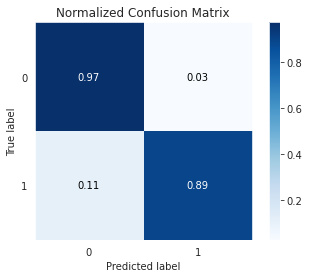

In [32]:
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_gnb, digits=3))
skplt.metrics.plot_confusion_matrix(y_test, y_pred_gnb, normalize=True);

# acuracia e recall do modelo
print("Acurácia de : {:.3f}\n".format(accuracy_score(y_test, y_pred_gnb)))
print("Recall de: {:.3f}\n".format(recall_score(y_test, y_pred_gnb)))
print("ROC AUC Score: {:.3f}\n".format(roc_auc_score(y_test, y_pred_gnb)))


#### Tabela de Comparação entre os modelos


Vamos compara o desempenho dos modelos:

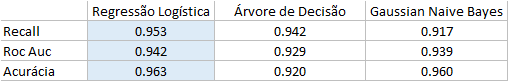

De acordo com as métricas de desempenho, o modelo que melhor previu as fraudes, portanto, foi o mais apropriádo para solucação do problema, foi o de Regressão Logística.

## Consclusões
Utilizando o conjunto de dados disponibilizado por algumas empresas européias de cartões de créditos, criamos nosso modelo de previsão de fraudes. Para isso, foi necessário uma análise do problema, exploração dos dados, tratamento e balanceamento dos dados, para que enfim, podéssemos treinar e testar nosso modelo de Machine Learning. 

É claro, nosso modelo não é perfeito, havendo espaço para aprimoramentos e otimizações do modelo escolhido, mas, o modelo obteve um ótimo desempenho com os dados de teste apresentados.

Nesse artigo, vimos um pequeno pedaço de todo o esforço desprendido para a criação de algorítmos capazes de classificar um fraude nas transações de cartão de crédito. Nas aplicações do mundo real, esse trabalho existe uma constate melhoria e aprimoramento dos parâmetros do modelo.